# Project: Customer Churn Prediction using Logistic Regression


In [4]:
#Import Required Libraries

import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns


from sklearn.metrics import log_loss
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

## Load Dataset

In [5]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/ChurnData.csv"

# Data Analysis and Visualization


In [6]:
original_df = pd.read_csv(url)
churn_df = original_df.copy()
churn_df

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,...,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,4.40,...,1.0,0.0,1.0,1.0,0.0,1.482,3.033,4.913,4.0,1.0
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,9.45,...,0.0,0.0,0.0,0.0,0.0,2.246,3.240,3.497,1.0,1.0
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,6.30,...,0.0,0.0,0.0,1.0,0.0,1.841,3.240,3.401,3.0,0.0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,6.05,...,1.0,1.0,1.0,1.0,1.0,1.800,3.807,4.331,4.0,0.0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,7.10,...,0.0,0.0,1.0,1.0,0.0,1.960,3.091,4.382,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,55.0,44.0,24.0,83.0,1.0,23.0,0.0,1.0,0.0,17.35,...,0.0,0.0,0.0,1.0,0.0,2.854,3.199,4.419,3.0,0.0
196,34.0,23.0,3.0,24.0,1.0,7.0,0.0,1.0,0.0,6.00,...,0.0,0.0,1.0,1.0,0.0,1.792,3.332,3.178,3.0,0.0
197,6.0,32.0,10.0,47.0,1.0,10.0,0.0,1.0,0.0,3.85,...,0.0,0.0,1.0,1.0,0.0,1.348,3.168,3.850,3.0,0.0
198,24.0,30.0,0.0,25.0,4.0,5.0,0.0,1.0,1.0,8.70,...,1.0,1.0,1.0,1.0,1.0,2.163,3.866,3.219,4.0,1.0


In [15]:
churn_df.shape

(200, 28)

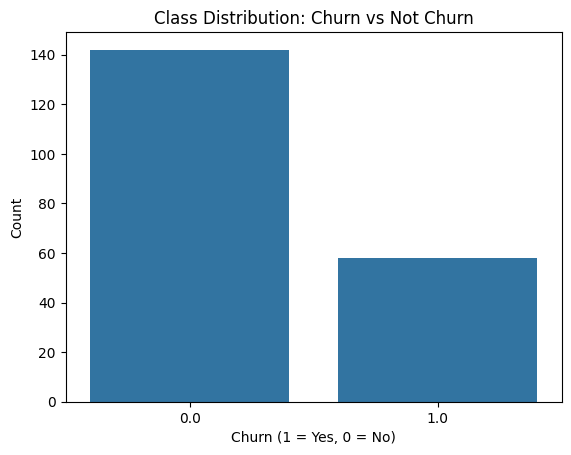

In [7]:
sns.countplot(x='churn', data=churn_df)
plt.title("Class Distribution: Churn vs Not Churn")
plt.xlabel("Churn (1 = Yes, 0 = No)")
plt.ylabel("Count")
plt.show()

In [12]:
missing = churn_df.isnull().sum()
missing

,0
tenure,0
age,0
address,0
income,0
ed,0
employ,0
equip,0
callcard,0
wireless,0
longmon,0


In [24]:
churn_df.duplicated().sum()

np.int64(0)

## Data Preprocessing (Initial Clean and Select Features)

##  Select features and set target dtype


In [4]:
churn_df = churn_df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip', 'churn']]
churn_df['churn'] = churn_df['churn'].astype('int')
churn_df

,tenure,age,address,income,ed,employ,equip,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,1
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,0
...,...,...,...,...,...,...,...,...
195,55.0,44.0,24.0,83.0,1.0,23.0,0.0,0
196,34.0,23.0,3.0,24.0,1.0,7.0,0.0,0
197,6.0,32.0,10.0,47.0,1.0,10.0,0.0,0
198,24.0,30.0,0.0,25.0,4.0,5.0,0.0,1


## Split into input and output


In [5]:
X = np.asarray(churn_df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip']])
X[0:5]

array([[ 11.,  33.,   7., 136.,   5.,   5.,   0.],
       [ 33.,  33.,  12.,  33.,   2.,   0.,   0.],
       [ 23.,  30.,   9.,  30.,   1.,   2.,   0.],
       [ 38.,  35.,   5.,  76.,   2.,  10.,   1.],
       [  7.,  35.,  14.,  80.,   2.,  15.,   0.]])

In [6]:
y = np.asarray(churn_df['churn'])
y[0:5]

array([1, 1, 0, 0, 0])

##Normalize features


In [7]:
X_norm = StandardScaler().fit(X).transform(X)
X_norm[0:5]

array([[-1.13518441, -0.62595491, -0.4588971 ,  0.4751423 ,  1.6961288 ,
        -0.58477841, -0.85972695],
       [-0.11604313, -0.62595491,  0.03454064, -0.32886061, -0.6433592 ,
        -1.14437497, -0.85972695],
       [-0.57928917, -0.85594447, -0.261522  , -0.35227817, -1.42318853,
        -0.92053635, -0.85972695],
       [ 0.11557989, -0.47262854, -0.65627219,  0.00679109, -0.6433592 ,
        -0.02518185,  1.16316   ],
       [-1.32048283, -0.47262854,  0.23191574,  0.03801451, -0.6433592 ,
         0.53441472, -0.85972695]])

## Train-Test Split


In [8]:
X_train, X_test, y_train, y_test = train_test_split( X_norm, y, test_size=0.2, random_state=4)

## Model Training

In [9]:
LR = LogisticRegression().fit(X_train,y_train)

In [10]:
yhat_prob = LR.predict_proba(X_test)
yhat_prob[:10]

array([[0.74643946, 0.25356054],
       [0.92667894, 0.07332106],
       [0.83442627, 0.16557373],
       [0.94600618, 0.05399382],
       [0.84325532, 0.15674468],
       [0.71448367, 0.28551633],
       [0.77076426, 0.22923574],
       [0.90955642, 0.09044358],
       [0.26152115, 0.73847885],
       [0.94900731, 0.05099269]])

## Data Visualization: Feature Importance

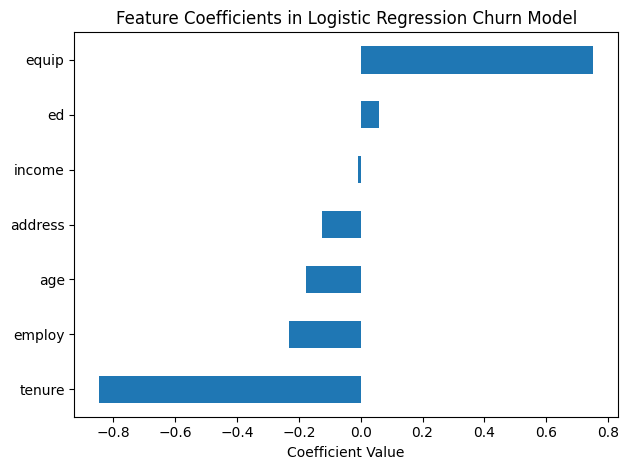

In [11]:
# Visualize Feature Coefficients and Save the Plot
coefficients = pd.Series(LR.coef_[0], index=churn_df.columns[:-1])
coefficients.sort_values().plot(kind='barh')
plt.title("Feature Coefficients in Logistic Regression Churn Model")
plt.xlabel("Coefficient Value")
plt.tight_layout()
plt.savefig("logistic_regression_coefficients.png", dpi=300)
plt.show()

##  Model Evaluation (Log Loss)

In [12]:
print('log loss in Logistic Regression Churn Model:')
log_loss(y_test,yhat_prob)

log loss in Logistic Regression Churn Model:


0.6257718410257235

# Feature Evaluation: Adding 'callcard' to the Model


In [13]:
churn_df = original_df.copy()

churn_df = churn_df[['tenure', 'age', 'address', 'income', 'ed',  'employ', 'equip', 'callcard', 'churn']]
churn_df['churn'] = churn_df['churn'].astype('int')
churn_df

,tenure,age,address,income,ed,employ,equip,callcard,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,1
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0
...,...,...,...,...,...,...,...,...,...
195,55.0,44.0,24.0,83.0,1.0,23.0,0.0,1.0,0
196,34.0,23.0,3.0,24.0,1.0,7.0,0.0,1.0,0
197,6.0,32.0,10.0,47.0,1.0,10.0,0.0,1.0,0
198,24.0,30.0,0.0,25.0,4.0,5.0,0.0,1.0,1


In [14]:
X = np.asarray(churn_df.drop('churn', axis=1))
y = np.asarray(churn_df['churn'])

In [15]:
X_norm = StandardScaler().fit(X).transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.2, random_state=4)

LR = LogisticRegression().fit(X_train, y_train)

yhat = LR.predict(X_test)
yhat_prob = LR.predict_proba(X_test)

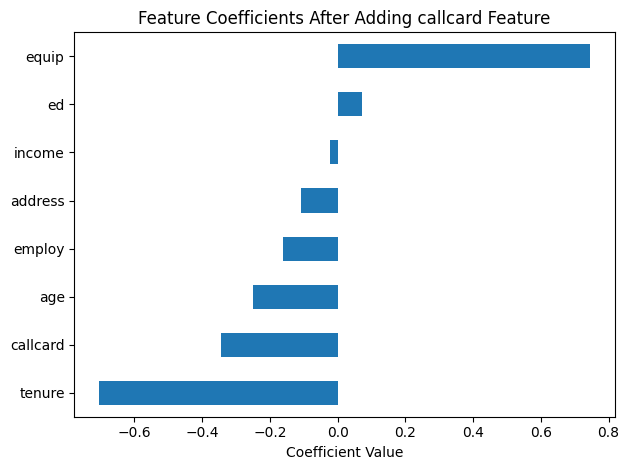

In [16]:
coefficients = pd.Series(LR.coef_[0], index=churn_df.columns[:-1])
coefficients.sort_values().plot(kind='barh')
plt.title("Feature Coefficients After Adding callcard Feature")
plt.xlabel("Coefficient Value")
plt.tight_layout()
plt.savefig("feature_coefficients_callcard.png", dpi=300)
plt.show()

In [17]:
print('log loss After Adding callcard Feature:')
log_loss(y_test,yhat_prob)

log loss After Adding callcard Feature:


0.6039104035600186

# Feature Evaluation: Adding 'wireless' to the Model


In [18]:
churn_df = original_df.copy()

churn_df = churn_df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip', 'wireless', 'churn']]
churn_df['churn'] = churn_df['churn'].astype('int')

In [19]:
X = np.asarray(churn_df.drop('churn', axis=1))
y = np.asarray(churn_df['churn'])

In [20]:
X_norm = StandardScaler().fit(X).transform(X)

X_train, X_test, y_train, y_test = train_test_split( X_norm, y, test_size=0.2, random_state=4)

LR = LogisticRegression().fit(X_train, y_train)

yhat_prob = LR.predict_proba(X_test)

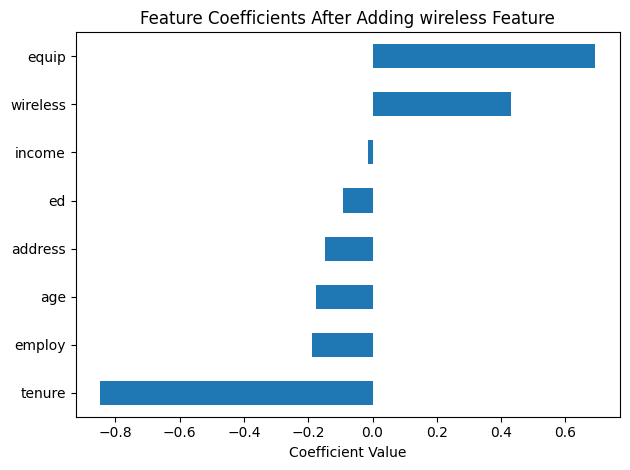

In [21]:
coefficients = pd.Series(LR.coef_[0], index=churn_df.columns[:-1])
coefficients.sort_values().plot(kind='barh')
plt.title("Feature Coefficients After Adding wireless Feature")
plt.xlabel("Coefficient Value")
plt.tight_layout()
plt.savefig("feature_coefficients_wireless.png", dpi=300)
plt.show()

In [22]:
print('log loss After Adding wireless Feature:')
log_loss(y_test,yhat_prob)

log loss After Adding wireless Feature:


0.7227054293985518

# Feature Evaluation: Adding Both 'callcard' and 'wireless'


In [23]:
churn_df = original_df.copy()
churn_df = churn_df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip', 'churn', 'callcard','wireless']]

churn_df['churn'] = churn_df['churn'].astype('int')

X = np.asarray(churn_df.drop('churn', axis=1))

y = np.asarray(churn_df['churn'])

X_norm = StandardScaler().fit(X).transform(X)

X_train, X_test, y_train, y_test = train_test_split( X_norm, y, test_size=0.2, random_state=4)

LR = LogisticRegression().fit(X_train, y_train)

yhat_prob = LR.predict_proba(X_test)


print('log loss After Adding Both callcard and wireless Features: ')
log_loss(y_test,yhat_prob)

log loss After Adding Both callcard and wireless Features: 


0.7760557225417115

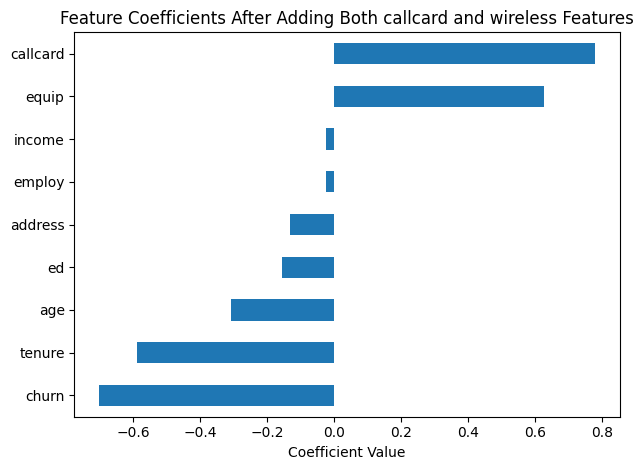

In [24]:
coefficients = pd.Series(LR.coef_[0], index=churn_df.columns[:-1])
coefficients.sort_values().plot(kind='barh')
plt.title("Feature Coefficients After Adding Both callcard and wireless Features")
plt.xlabel("Coefficient Value")
plt.tight_layout()
plt.savefig("feature_coefficients_callcard_wireless.png", dpi=300)
plt.show()

## Feature Evaluation: Removing 'income' and 'employ'


In [25]:
churn_df = original_df.copy()
churn_df = churn_df[['tenure', 'age', 'address', 'ed', 'equip', 'churn']]
churn_df['churn'] = churn_df['churn'].astype('int')

X = np.asarray(churn_df.drop('churn', axis=1))

y = np.asarray(churn_df['churn'])

X_norm = StandardScaler().fit(X).transform(X)

X_train, X_test, y_train, y_test = train_test_split( X_norm, y, test_size=0.2, random_state=4)

LR = LogisticRegression().fit(X_train, y_train)

yhat_prob = LR.predict_proba(X_test)


print('log loss After Removing income and employ Features: ')
log_loss(y_test,yhat_prob)

log loss After Removing income and employ Features: 


0.6529317169884828

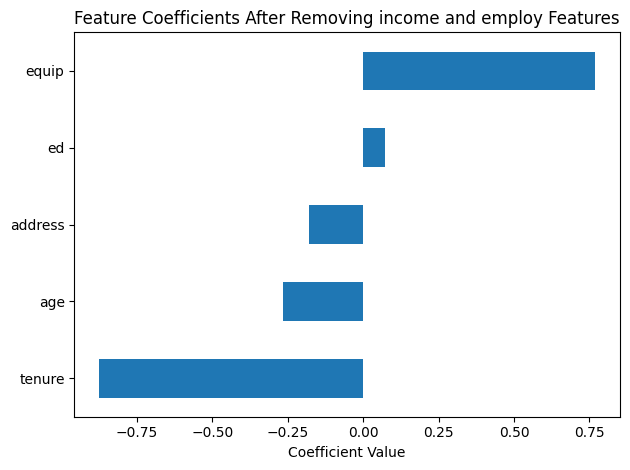

In [26]:
coefficients = pd.Series(LR.coef_[0], index=churn_df.columns[:-1])
coefficients.sort_values().plot(kind='barh')
plt.title("Feature Coefficients After Removing income and employ Features")
plt.xlabel("Coefficient Value")
plt.tight_layout()
plt.savefig("feature_coefficients_remove_income_employ.png", dpi=300)
plt.show()

#  Feature Evaluation: Removing 'equip' from the Model


In [27]:
churn_df = original_df.copy()
churn_df = churn_df[['tenure', 'age', 'address', 'income', 'ed', 'employ','churn']]
churn_df['churn'] = churn_df['churn'].astype('int')

X = np.asarray(churn_df.drop('churn', axis=1))

y = np.asarray(churn_df['churn'])

X_norm = StandardScaler().fit(X).transform(X)

X_train, X_test, y_train, y_test = train_test_split( X_norm, y, test_size=0.2, random_state=4)

LR = LogisticRegression().fit(X_train, y_train)

yhat_prob = LR.predict_proba(X_test)


print('log loss After Removing equip Feature: ')
log_loss(y_test,yhat_prob)

log loss After Removing equip Feature: 


0.5302427350245369

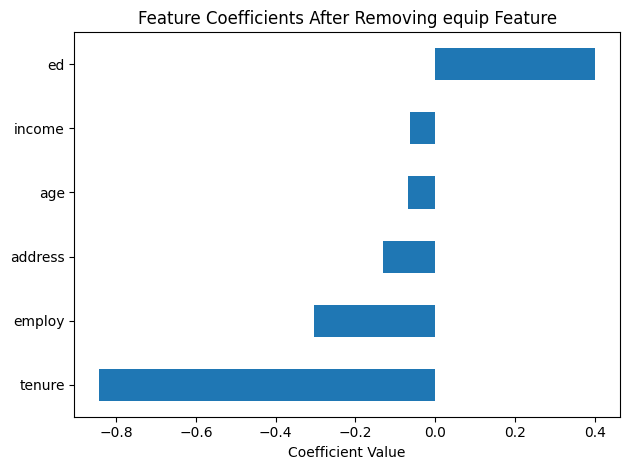

In [28]:
coefficients = pd.Series(LR.coef_[0], index=churn_df.columns[:-1])
coefficients.sort_values().plot(kind='barh')
plt.title("Feature Coefficients After Removing equip Feature")
plt.xlabel("Coefficient Value")
plt.tight_layout()
plt.savefig("feature_coefficients_remove_equip.png", dpi=300)
plt.show()

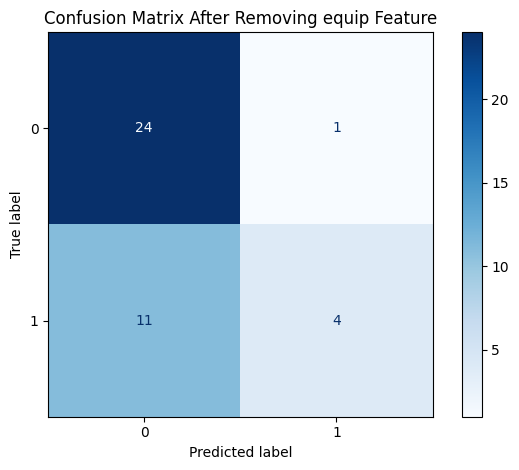

In [29]:
# Generate and Visualize Confusion Matrix for Model Predictions
yhat = LR.predict(X_test)
cm = confusion_matrix(y_test, yhat)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=LR.classes_)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix After Removing equip Feature")
plt.tight_layout()
plt.savefig("confusion_matrix_remove_equip.png", dpi=300)
plt.show()

##Logistic Regression Model with Balanced Class Weights to Handle Class Imbalance


In [30]:
# Logistic Regression with class_weight='balanced'
LR = LogisticRegression(class_weight='balanced').fit(X_train, y_train)

# Predictions
yhat = LR.predict(X_test)
yhat_prob = LR.predict_proba(X_test)

print('log loss After Removing equip Feature and Balanced Class Weights : ')
log_loss(y_test, yhat_prob)

log loss After Removing equip Feature and Balanced Class Weights : 


0.46483271129639653

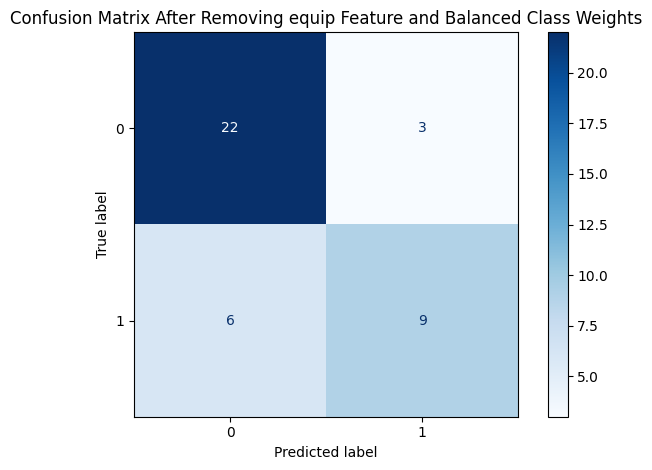

In [31]:
# Generate and Visualize Confusion Matrix for Model Predictions

yhat = LR.predict(X_test)
cm = confusion_matrix(y_test, yhat)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=LR.classes_)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix After Removing equip Feature and Balanced Class Weights")
plt.tight_layout()
plt.savefig("confusion_matrix_after_removing_equip_balanced.png", dpi=300)
plt.show()